In [1]:
import time_series_numerical_predictor as predictor
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

look_back = 40

# 1. 데이터셋 생성하기
signal_data = np.cos(np.arange(1600)*(20*np.pi/1000))[:,None]

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
signal_data = scaler.fit_transform(signal_data)

# 데이터 분리
train = signal_data[0:800]
val = signal_data[800:1200]
test = signal_data[1200:]

# 데이터셋 생성
x_train, y_train = predictor.create_dataset(train, look_back)
x_val, y_val = predictor.create_dataset(val, look_back)
x_test, y_test = predictor.create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

# 모델 학습과정 설정
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
from time_series_numerical_predictor import CustomHistory
custom_hist = CustomHistory()
custom_hist.init()

for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()

Using TensorFlow backend.


Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 38s 50ms/step - loss: 0.0674 - val_loss: 0.0746
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 36s 48ms/step - loss: 0.0565 - val_loss: 0.0118
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 36s 47ms/step - loss: 0.0195 - val_loss: 0.0089
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 33s 44ms/step - loss: 0.0092 - val_loss: 0.0078
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 33s 43ms/step - loss: 0.0110 - val_loss: 0.0085
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 33s 43ms/step - loss: 0.0095 - val_loss: 0.0463
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 33s 43ms/step - los

760/760 [==============================] - 32s 42ms/step - loss: 0.0049 - val_loss: 0.0011
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 32s 42ms/step - loss: 0.0037 - val_loss: 0.0081
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 32s 42ms/step - loss: 0.0045 - val_loss: 0.0141
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 32s 42ms/step - loss: 0.0077 - val_loss: 0.0096
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 31s 41ms/step - loss: 0.0048 - val_loss: 8.7878e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 32s 41ms/step - loss: 0.0057 - val_loss: 0.0097
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 31s 41ms/step - loss: 0.0047 - val_loss: 0.0016
Train on 760 samples, v

760/760 [==============================] - 30s 40ms/step - loss: 0.0025 - val_loss: 0.0036
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 30s 40ms/step - loss: 0.0031 - val_loss: 0.0018
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 30s 40ms/step - loss: 0.0028 - val_loss: 0.0019
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 30s 40ms/step - loss: 0.0032 - val_loss: 0.0013
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 31s 40ms/step - loss: 0.0028 - val_loss: 9.6850e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 30s 40ms/step - loss: 0.0028 - val_loss: 0.0014
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 30s 40ms/step - loss: 0.0031 - val_loss: 0.0048
Train on 760 samples, v

760/760 [==============================] - 29s 38ms/step - loss: 0.0023 - val_loss: 7.8309e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0026 - val_loss: 4.4575e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0030 - val_loss: 0.0208
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0046 - val_loss: 0.0011
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0022 - val_loss: 1.6550e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0023 - val_loss: 6.2448e-04
Train on 760 samples, validate on 360 samples
Epoch 1/1
760/760 [==============================] - 29s 38ms/step - loss: 0.0021 - val_loss: 0.0016
Train on 76

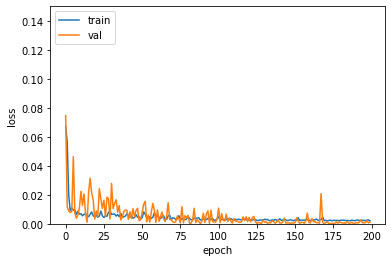

Train Score:  0.0012296770512989497
Validataion Score:  0.0012303571830557304
Test Score:  0.0012303571830557304


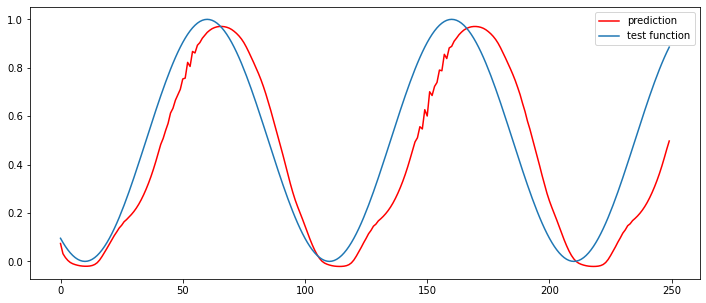

In [2]:
# 학습 과정 출력
predictor.show_model_learning_process(custom_hist.train_loss, custom_hist.val_loss)

# 모델 평가
predictor.evaluate_model(model, x_train, y_train, x_val, y_val, x_test, y_test, batch_size=1)

# 모델 사용
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])

predictor.print_used_model(y_test, look_ahead, predictions)